#Importing the libraries

In [68]:
#import all the necessary libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

#Importing the dataset

In [69]:
#import the dataset

dataset = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

#Observing the dataset

In [70]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We will be predicting the cost of medical insurance for individuals based on a number of different parameters such as age, sex, bmi, children, smoking_status and resedential_region

#Preprocessing and visualizing the data

In [71]:
#Let's see the basic information of our dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


##Encoding

In [72]:
#Let's use one-hot encoding to encode the non-numerical values

enc_dataset = pd.get_dummies(dataset)
enc_dataset

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


##Visualizing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c4609990>,
      dtype=object)

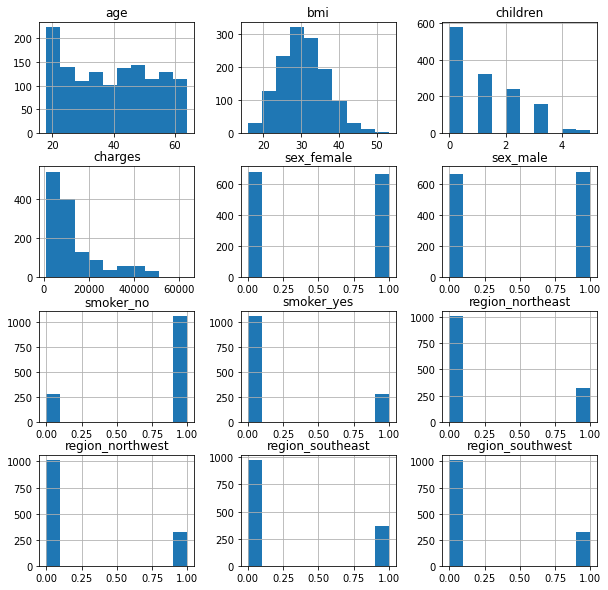

In [73]:
#Lets draw histogram graphs 


enc_dataset.hist(figsize=(10,10),bins=10)

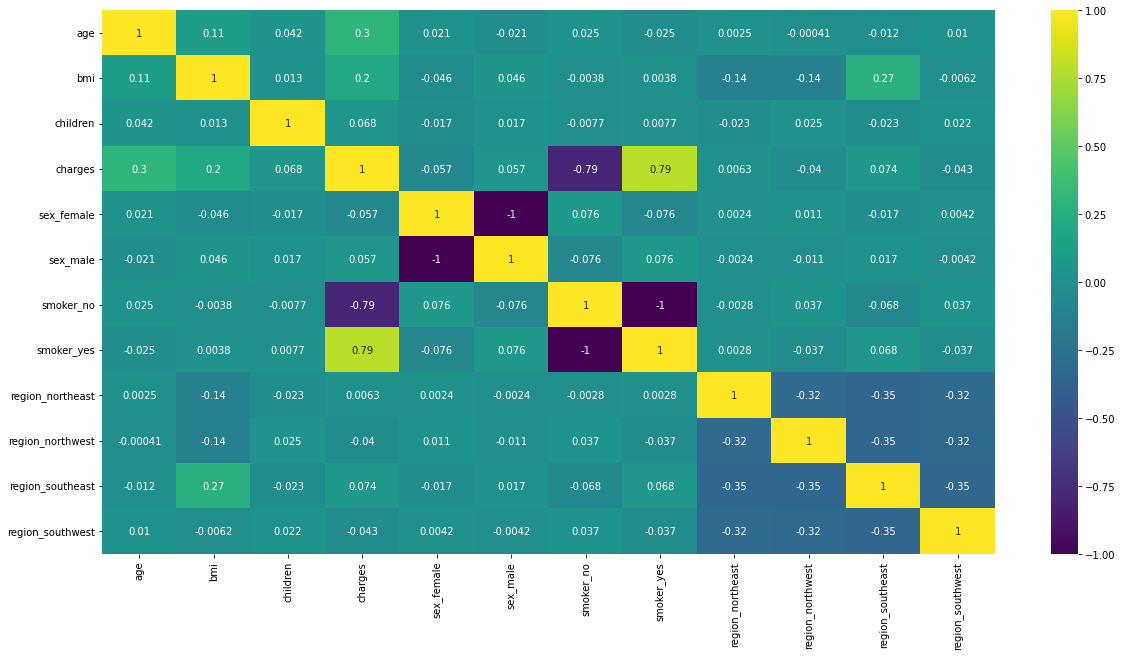

In [74]:
#checking the correlation
plt.figure(figsize=(20,10))
sns.heatmap(enc_dataset.corr(),annot= True,cmap = 'viridis')
plt.show()

#Categorising into Input features and Output labels

In [75]:
#Let's split the dataset into x(input features) and y(output labels)

x = enc_dataset.drop("charges", axis = 1)
y = enc_dataset["charges"].values

In [76]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [77]:
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

#Splitting the whole dataset into Training and Testing parts

In [78]:
#Let's split the dataset into testing and training parts

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 22)

In [79]:
x_train.shape, x_test.shape

((1070, 11), (268, 11))

In [80]:
y_train.shape, y_test.shape

((1070,), (268,))

In [81]:
x_train.size

11770

#Building and Fitting the Model-1

In [82]:
#Setting the random seed

tf.random.set_seed(22)

#create a new model

mic_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile the model

mic_model.compile(loss=tf.keras.losses.mae, 
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

#fit the model

mic_model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 0s 1ms/step - loss: 12808.4834 - mae: 12808.4834
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 11970.2197 - mae: 11970.2197
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 11151.7783 - mae: 11151.7783
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 10395.6973 - mae: 10395.6973
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 9759.8291 - mae: 9759.8291
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 9217.4746 - mae: 9217.4746
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8763.8047 - mae: 8763.8047
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 8395.0439 - mae: 8395.0439
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 8103.5151 - mae: 8103.5151
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 7885.6699 - mae: 7

In [83]:
#check the results of the encoded medical insurance cost model

m1= mic_model.evaluate(x_test, y_test)
m1

9/9 [==============================] - 0s 2ms/step - loss: 7014.9355 - mae: 7014.9355


[7014.935546875, 7014.935546875]

#Building Model-2

Changing the optimizer from SGD to Adam

In [84]:
# Set random seed
tf.random.set_seed(22)

# Adding extra layers and increasing the number of units
mic_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1) 
])

# Compile the model
mic_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
mic_model_2.fit(x_train, y_train, epochs=100, verbose=0)

In [85]:
# Evaluating the model-2
m2= mic_model_2.evaluate(x_test, y_test)
m2

9/9 [==============================] - 0s 2ms/step - loss: 13184.3320 - mae: 13184.3320


[13184.33203125, 13184.33203125]

In [86]:
#It gave more loss

#Building Model-3

Increasing the number of layers

In [87]:
# Set random seed
tf.random.set_seed(22)

# Adding extra layers and increasing the number of units
mic_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
mic_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
mic_model_3.fit(x_train, y_train, epochs=100, verbose=0)

In [88]:
# Evaluating the model-3
m3=mic_model_3.evaluate(x_test, y_test)
m3

9/9 [==============================] - 0s 2ms/step - loss: 4967.8926 - mae: 4967.8926


[4967.892578125, 4967.892578125]

Its better than before score...

#Building Model-4

Increasing the epoch value

In [89]:
# Set random seed
tf.random.set_seed(22)

# Adding extra layers and increasing the number of units
mic_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
mic_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
mic_model_4.fit(x_train, y_train, epochs=600, verbose=0)

In [90]:
# Evaluating the model-4
m4= mic_model_4.evaluate(x_test, y_test)
m4

9/9 [==============================] - 0s 3ms/step - loss: 3129.8071 - mae: 3129.8071


[3129.80712890625, 3129.80712890625]

#Comparing the results of the models

In [91]:
#let's compare all the models' score

model_results = [["model_1", m1],
                 ["model_2", m2],
                 ["model_3", m3],
                 ["model_4", m4]]

In [92]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "score"])
all_results

,model,score
0,model_1,"[7014.935546875, 7014.935546875]"
1,model_2,"[13184.33203125, 13184.33203125]"
2,model_3,"[4967.892578125, 4967.892578125]"
3,model_4,"[3129.80712890625, 3129.80712890625]"


This tells that Model-4 has given a better value with less loss value...

#Scaling methods:
1.   **Normalization**
its the process of converting all the original values to the values in between the range 0 and 1.

This is done by subtracting the minimum value then dividing by the maximum value minus the minmum. This is also referred to as min-max scaling.

2.   **Standardization**
its the process of converting all the data to unit variance and 0 mean.

This is done by substracting the mean value from the target feature and then dividing it by the standard deviation.



#Normalization

Now let's build a model again with the normalized values.

In [93]:
#let's view our dataset again

dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Importing the necessary libraries

In [94]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

##Encoding numerical values with MinMax scaler and non-numerical values with OneHotEncoder

In [95]:
# getting all values between 0 and 1 and doing the one-hot encoding

ct = make_column_transformer(
    # getting all values to between 0 and 1
    (MinMaxScaler(), ["age", "bmi", "children"]), 
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"]))

In [96]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##Input and Output values

In [97]:
#creating x and y values:input and output

x = dataset.drop("charges", axis=1)
y = dataset["charges"]

##Training and Testing dataparts

In [98]:
# Build our train and test sets (use random state to ensure same split as before)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=22)



##Transforming the actual column values with Normalized values

In [99]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(x_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [100]:
# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [101]:
# Non-normalized and non-one-hot encoded data example
print(x_train.loc[0])

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object


In [102]:
# Normalized and one-hot encoded example
print(x_train_normal[0])

[0.58695652 0.22464353 1.         0.         1.         1.
 0.         0.         0.         1.         0.        ]


In [103]:
# Notice the normalized/one-hot encoded shape is larger because of the extra columns
x_train_normal.shape, x_train.shape

((1070, 11), (1070, 6))

##Building the model with Normalized dataset

In [104]:
# Set random seed
tf.random.set_seed(22)

# Adding extra layers and increasing the number of units
new_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 units
  tf.keras.layers.Dense(10), # 10 units
  tf.keras.layers.Dense(1) # 1 unit (important for output layer)
])

# Compile the model
new_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), # Adam works but SGD doesn't 
                          metrics=['mae'])

# Fit the model and save the history (we can plot this)
new_model_4.fit(x_train_normal, y_train, epochs=600, verbose=0)

##Evaluating the score

In [105]:
# Evaulate the normalized model-4
new_model_4_loss, new_model_4_mae = new_model_4.evaluate(x_test_normal, y_test)


9/9 [==============================] - 0s 2ms/step - loss: 3100.3003 - mae: 3100.3003


#Comparing the score with Non-normalized model

In [108]:
#let's see the score of non-normalized model-4

m4

#it even took more time to compute i.e,0s 3ms/step

[3129.80712890625, 3129.80712890625]

#Observation

We can observe that normalized model has given less loss score and less time to compute than the non-normalized model.

#OUR MEDICAL_INSURANCE_COST PREDICTION MODEL IS BUILT...